In [1]:
# src https://github.com/cs109/2015lab11/blob/master/Lab11-Project-and-Food-Inspection-Forecasting.ipynb
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

#http://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [2]:
dfErlog = pd.read_csv('data/akutliggare.txt', sep='|')

print dfErlog.shape
dfErlog.head()



(454803, 109)


,PatientID,DokumentID,AkutliggareID,PasID,AnkomstsattID,ProblemorsakID,BesoksorsakID,ForstaBesoksorsakID,FlyttadTillVardenhetID,FlyttadTillLokationID,...,AntalAvlidnaInom7Dagar,AntalAvlidnaInom30Dagar,AntalSlutenvardInom6Timmar,AntalSlutenvardInom12Timmar,AntalDiagnoserOppenvard,AntalDiagnoserSlutenvard,AntalDiagnoser,Alder,SenastUppdaterad,AntalOvernattningar
0,-9220869629625426145,6,1,373,3266,3795,6863,6863,335,NaN,...,0,0,1,1,0,3,3,50,2014-07-29 23:23:08.000,0
1,-9220049438171032127,6,2,463,3272,3795,1908,1908,NaN,-92,...,0,0,0,0,0,NaN,0,"0,49039700000000003",2014-02-15 22:33:42.000,0
2,-9216200646992851360,6,313724,2804369,3272,3795,3213,3213,NaN,-91,...,0,0,0,0,1,NaN,1,"6,4931369999999999",2013-05-11 22:01:06.000,0
3,-9210158571153385697,6,313725,2804882,3272,3261,3172,6881,NaN,-91,...,0,0,0,0,1,NaN,1,"31,657516000000001",2013-10-20 20:53:17.000,0
4,-9209910299446293692,6,313726,2804897,3272,3260,6849,6849,NaN,-91,...,0,0,0,0,1,NaN,1,"21,958877000000001",2013-09-07 00:31:40.000,0


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


year  patienttype
2013  Inpatient       44867
      Other          178728
2014  Inpatient       45188
      Other          186020
Name: year, dtype: int64


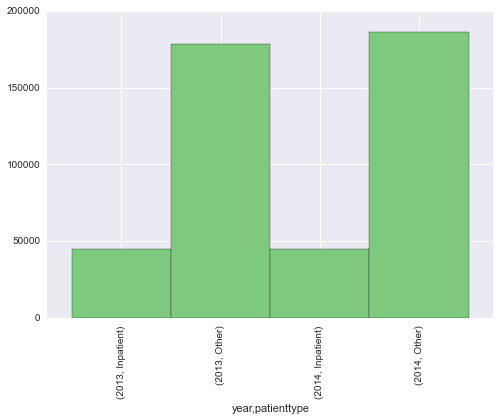

In [4]:
# Inpatient vs other 
import datetime
import math
dfInpatient = dfErlog[['ForstaSlutenvardVardenhetID','Alder','Ankomsttidpunkt']]
dfInpatient['year'] = dfInpatient.apply(lambda x: x['Ankomsttidpunkt'][0:4], axis=1)
dfInpatient['patienttype'] = dfInpatient.apply(lambda x: 'Other' if math.isnan(x['ForstaSlutenvardVardenhetID']) else 'Inpatient', axis=1)

dfChart = dfInpatient[['year','patienttype']]

import matplotlib.cm as cm
sns.set() #make the plots look pretty

ag = dfChart.groupby(['year','patienttype']).year.count() #.unstack()

print ag

#ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

